In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
print(df.head())



  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [ ]:
print('Shape of the data :\n',df.shape)

print("\nData information :\n",df.info())

print('\nMissing values :\n',df.isnull().sum())

print('Shows any duplicate values :\n',df.duplicated().sum())

print('\nDescriptive  statistics :\n',df.describe())

Shape of the data :
 (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Data information :
 None

Missing values :
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating 

In [ ]:
df_rename = df.rename(columns={'date_added':'date_year'})
print('\nColumn name changed :\n',df_rename.head())

df_year = df[(df['release_year'] > 1996) & (df['release_year'] < 2009)]
print('\nYear :\n',df_year)

df_year_or = df[(df['release_year'] > 1996) | (df['release_year'] < 2009)]
print('\nYear :\n',df_year_or)


Column name changed :
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

            date_year  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Se

In [ ]:
df_sort = df.sort_values('release_year')
print('\nSorting :\n',df_sort)

df_count = df['country'].value_counts()
print('\nCount :\n',df_count)

df_group = df.groupby('country')['release_year'].mean()
print('\nGroup :\n',df_group)

df_fill = df[['director','cast','country','date_added','rating','duration']].fillna('Unknown')
print('\nFill :\n',df_fill)

df['release_year'] = df['release_year'].astype('int64')
print('\nData type :\n',df.dtypes)

def year(y):
  if y > 2000:
    return 'New'
  else:
    return 'Old'
df['Year'] = df['release_year'].apply(year)
print('\nNew column :\n',df.head())

df['director'] = df['director'].str.upper()
print(df.head())

print('\n1st index using loc :\n',df.loc[1])
print('\nfrom 1st row to 3rd row :\n',df.loc[1:3])
print('\nselecting specific columns with index from 2 to 6 :\n',df.loc[2:6,['type','title','director']])

print('\n2nd index using iloc :\n',df.iloc[2])
print('\nfrom 1st row to 3rd row :\n',df.iloc[1:4])
print('\nselecting specific columns with index from 2 to 6 :\n',df.iloc[2:7,1:3])


Sorting :
      show_id     type                               title  \
4250   s4251  TV Show   Pioneers: First Women Filmmakers*   
7790   s7791    Movie                      Prelude to War   
8205   s8206    Movie                The Battle of Midway   
8739   s8740    Movie  Why We Fight: The Battle of Russia   
8763   s8764    Movie     WWII: Report from the Aleutians   
...      ...      ...                                 ...   
3         s4  TV Show               Jailbirds New Orleans   
2         s3  TV Show                           Ganglands   
18       s19    Movie                           Intrusion   
1         s2  TV Show                       Blood & Water   
68       s69    Movie                          Schumacher   

                                               director  \
4250                                                NaN   
7790                                        Frank Capra   
8205                                          John Ford   
8739               

Numerical Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/netflix_titles.csv')
print(df.head())

#measure of central tendency
df_mean_of_year = df['release_year'].mean()
print('\nMean for the column release year :\n',df_mean_of_year)

df_median_of_year = df['release_year'].median()
print('\nMedian for the column release year :\n',df_median_of_year)

df_mode_of_year = df['release_year'].mode()
print('\nMode for the column release year :\n',df_mode_of_year)

# moment of dispersion
df_variance = df['release_year'].var()
print('\nVariance for the column release year :\n',df_variance)

df_std = df['release_year'].std()
print('\nStandard Deviation for the column release year :\n',df_std)

# 3rd moment of bussiness decision - skewness
df_skew = df['release_year'].skew()
print('\nSkewness for the column release year :\n',df_skew)

# 4th moment of bussiness decision - kurtosis
df_kurtosis = df['release_year'].kurt()
print('\nKurtosis for the column release year :\n',df_kurtosis)


  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

Graphical Exploratory Data Analysis

In [ ]:
sns.set(style='whitegrid')

univariate visualization

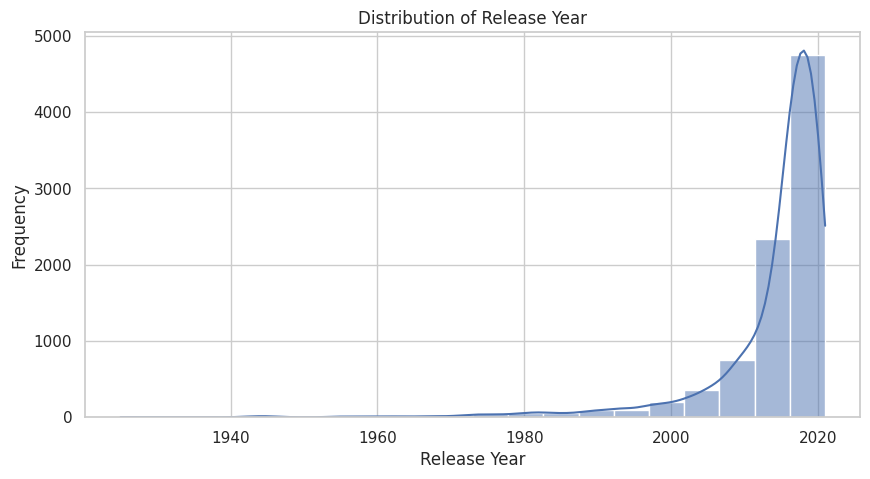

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'],bins=20,kde=True)
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

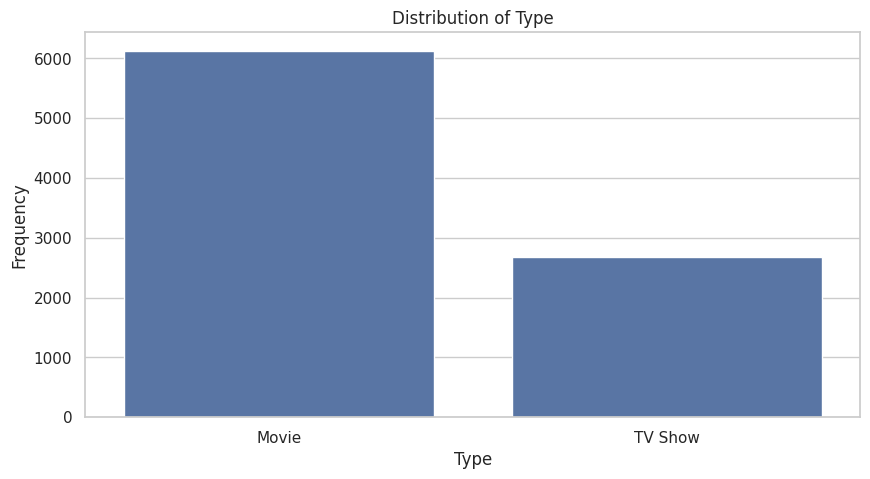

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='type',data=df)
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

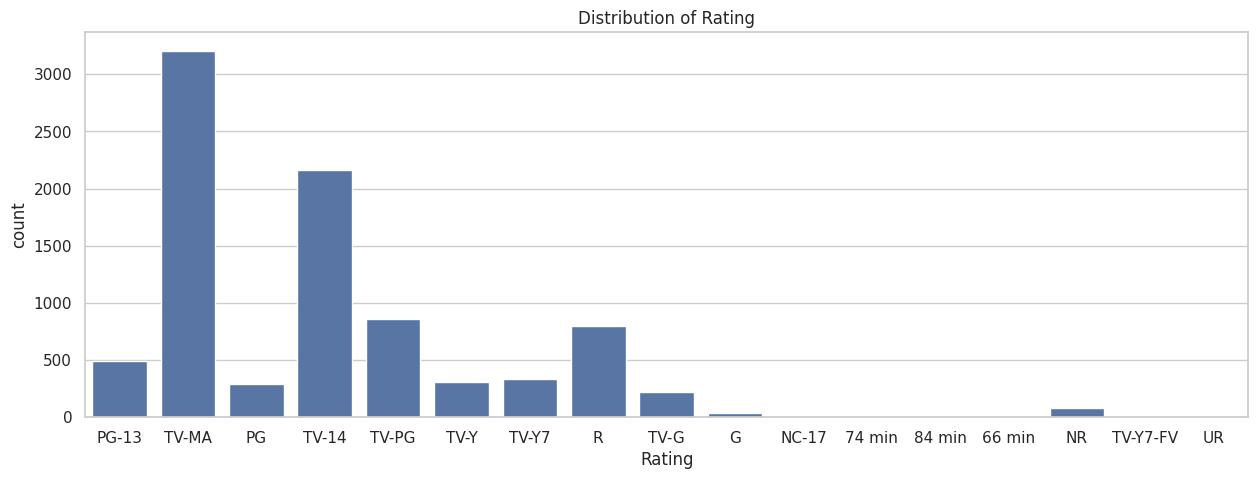

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='rating',data=df)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.show()

Bivariate Analysis

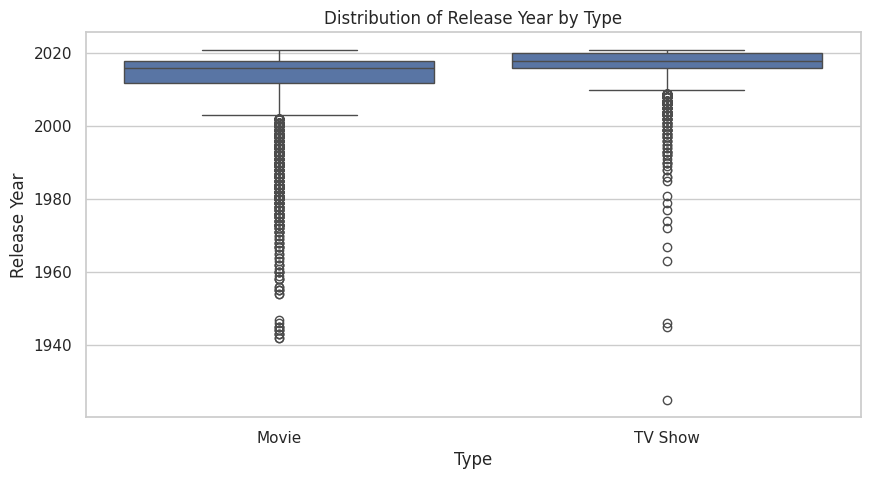

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='type',y='release_year',data=df)
plt.title('Distribution of Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

Text(0, 0.5, 'Release Year')

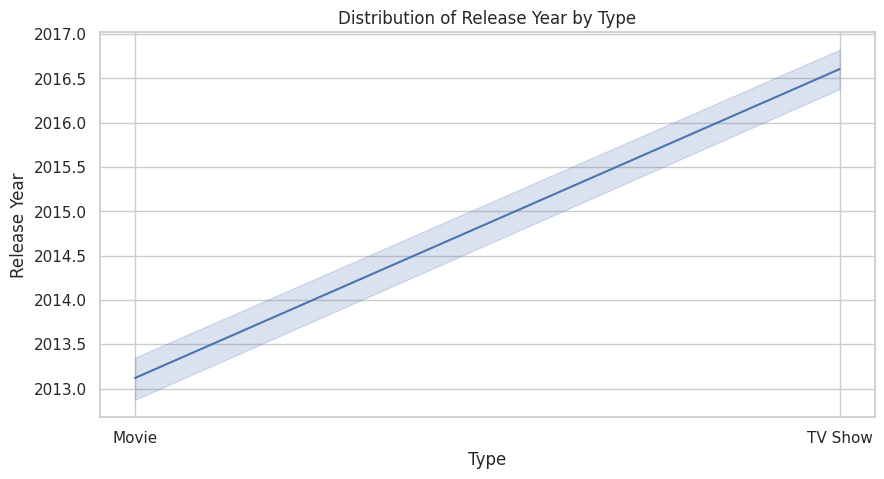

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='type',y='release_year',data=df)
plt.title('Distribution of Release Year by Type')
plt.xlabel('Type')
plt.ylabel('Release Year')

Categorical Variable Relationships

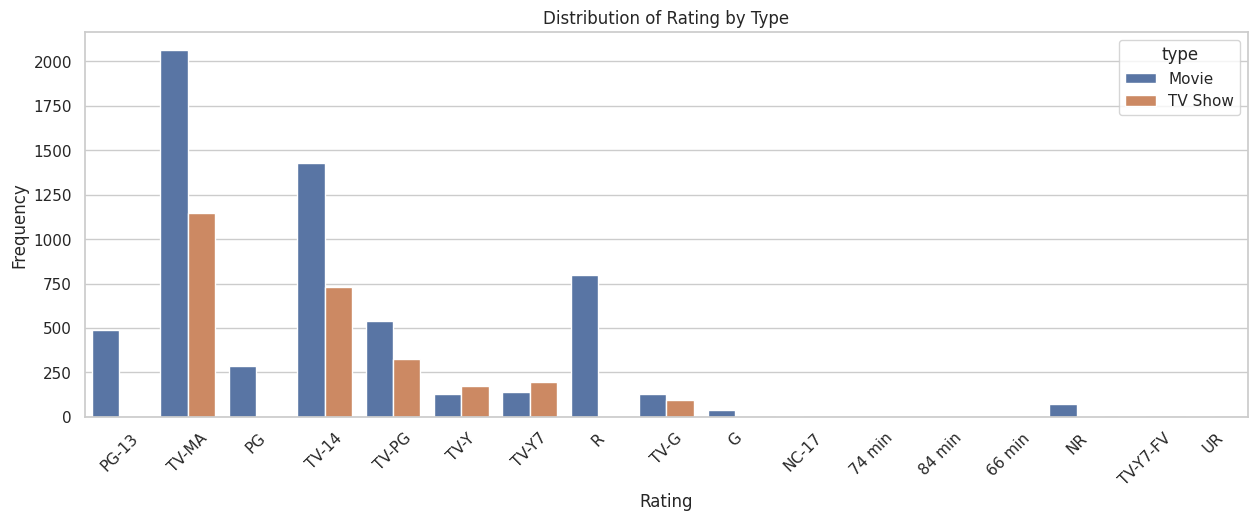

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='rating',hue='type',data=df)
plt.title('Distribution of Rating by Type')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Release Year')

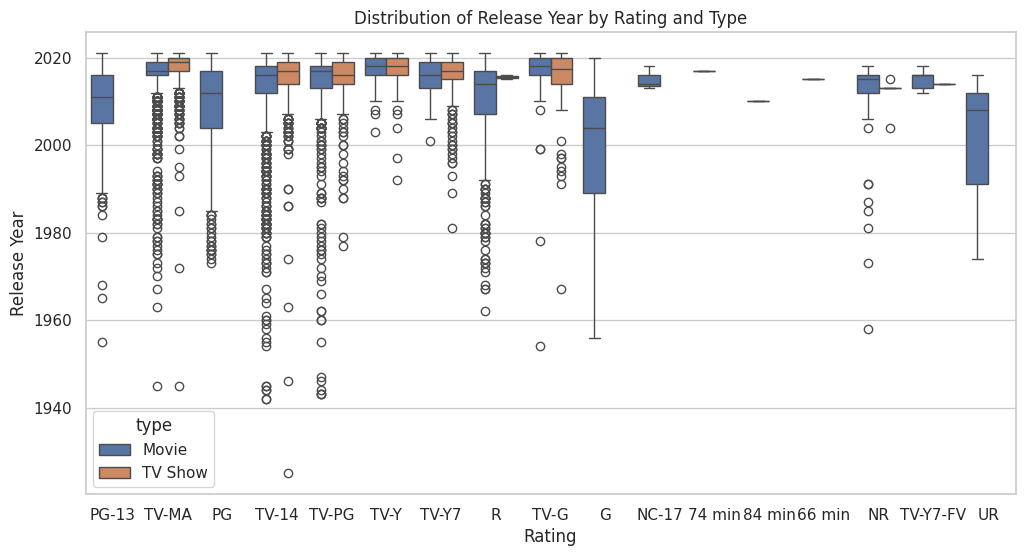

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating',y='release_year',hue='type',data=df)
plt.title('Distribution of Release Year by Rating and Type')
plt.xlabel('Rating')
plt.ylabel('Release Year')

Normalization

In [ ]:
#min-max
df_norm = df.copy()
for N in ['release_year']:
  min_val = df[N].min()
  max_val = df[N].max()
  df_norm[N] = (df[N] - min_val) / (max_val - min_val)
print(df_norm.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021      0.989583  PG-13     90 min   
1  September 24, 2021      1.000000  TV-MA  2 Seasons   
2  September 24, 2021      1.

Z-score standerization

In [ ]:
df_z = df.copy()
for Z in ['release_year']:
  df_mean = df[Z].mean()
  df_std = df[Z].std()
  df_z[Z] = (df[Z] - df_mean) / df_std
print(df_z.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021      0.659893  PG-13     90 min   
1  September 24, 2021      0.773281  TV-MA  2 Seasons   
2  September 24, 2021      0.

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_label = df.copy()
df_label['type'] = label.fit_transform(df_label['type'])
df_label['title'] = label.fit_transform(df_label['title'])
print('\nLabel Encoding :\n', df_label.head())


Label Encoding :
   show_id  type  title         director  \
0      s1     0   1975  Kirsten Johnson   
1      s2     1   1091              NaN   
2      s3     1   2651  Julien Leclercq   
3      s4     1   3506              NaN   
4      s5     1   3861              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  Septemb

one hot encoding

In [ ]:
df_one = pd.get_dummies(df,columns=['title','cast'])
print(df_one.head())

df_cat = [col for col in df_one.columns if col.startswith('title_') or col.startswith('cast_')]
df_one = df_one[['release_year'] + df_cat].astype(int)
print(df_one.head())

  show_id     type         director        country          date_added  \
0      s1    Movie  Kirsten Johnson  United States  September 25, 2021   
1      s2  TV Show              NaN   South Africa  September 24, 2021   
2      s3  TV Show  Julien Leclercq            NaN  September 24, 2021   
3      s4  TV Show              NaN            NaN  September 24, 2021   
4      s5  TV Show              NaN          India  September 24, 2021   

   release_year rating   duration  \
0          2020  PG-13     90 min   
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...

imputation

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df[['release_year']] = mean_imputer.fit_transform(df[['release_year']])
print('\nmean imputer :\n',df.head())

mode_imputer = SimpleImputer(strategy='most_frequent')
df[['release_year']] = mode_imputer.fit_transform(df[['release_year']])
print('\nmode imputer :\n',df.head())


mean imputer :
   show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021        2020.0  PG-13     90 min   
1  September 24, 2021        2021.0  TV-MA  2 Seasons   
2  September

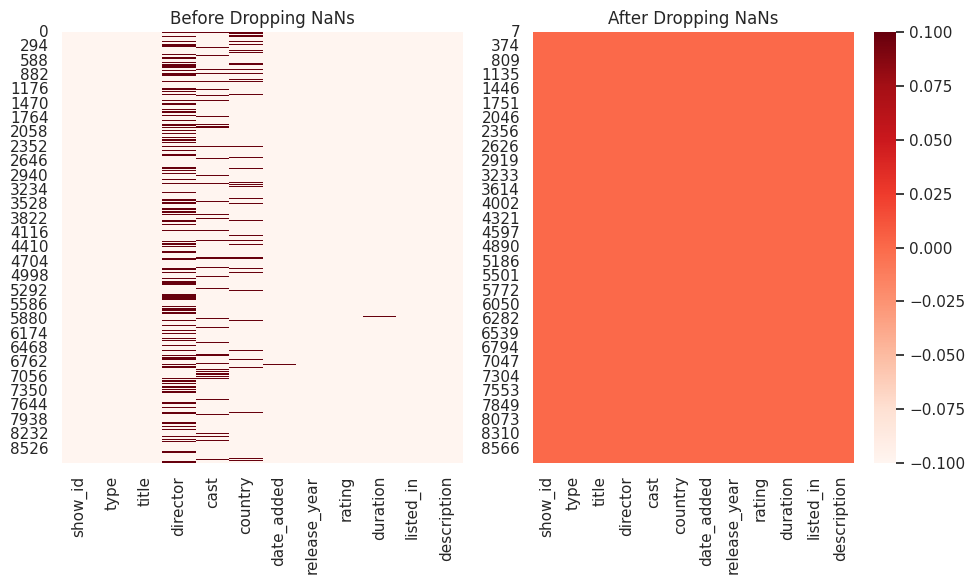

In [ ]:
# visualization

df_cleaned = df.dropna()

fig,axes = plt.subplots(1,2,figsize=(10,6))
#before imputation
sns.heatmap(pd.DataFrame(df).isnull(),cbar=False,ax=axes[0],cmap='Reds')
axes[0].set_title('Before Dropping NaNs')

#after dropping NaNs
sns.heatmap(df_cleaned.isnull(),cbar=True,cmap='Reds',ax=axes[1])
axes[1].set_title('After Dropping NaNs')
plt.tight_layout()
plt.show()

Binarization

/tmp/ipython-input-9254820.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['year'],ax=axes[1],palette='magma')


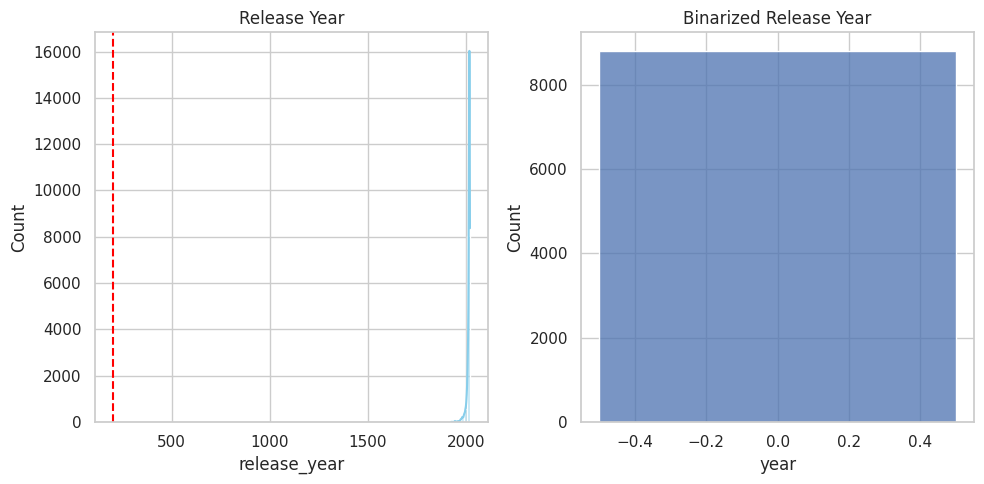

In [ ]:
from sklearn.preprocessing import Binarizer
binarizer_year = Binarizer(threshold=2021)

df['year'] = binarizer_year.fit_transform(df[['release_year']])

fig,axes = plt.subplots(1,2,figsize=(10,5))

sns.histplot(df['release_year'],bins=6,kde=True,ax=axes[0],color='skyblue')
axes[0].axvline(200,color='red',linestyle='--',linewidth=1.5)
axes[0].set_title('Release Year')
sns.histplot(df['year'],ax=axes[1],palette='magma')
axes[1].set_title('Binarized Release Year')
plt.tight_layout()
plt.show()

Winsorization

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 6.6 MB/s eta 0:00:00


<Axes: ylabel='release_year'>

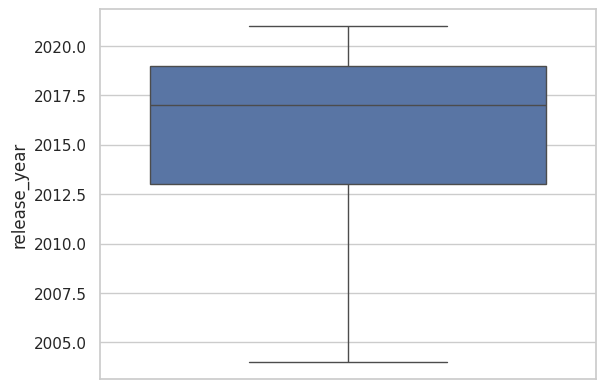

In [ ]:
from feature_engine.outliers import Winsorizer

winsorizer_iqr = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['release_year'])
df_winsorized = winsorizer_iqr.fit_transform(df[['release_year']])
sns.boxplot(df_winsorized.release_year)

<Axes: ylabel='release_year'>

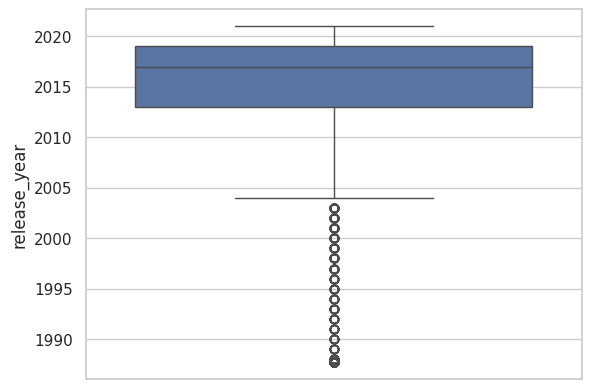

In [ ]:
winsorizer_gaussian = Winsorizer(capping_method='gaussian',tail='both',fold=3,variables=['release_year'])
df_winsorize = winsorizer_gaussian.fit_transform(df[['release_year']])
sns.boxplot(df_winsorize.release_year)

Discretization

/tmp/ipython-input-862999271.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['released_year'],ax=axes[1],palette='magma')


Text(0.5, 1.0, 'Released Year')

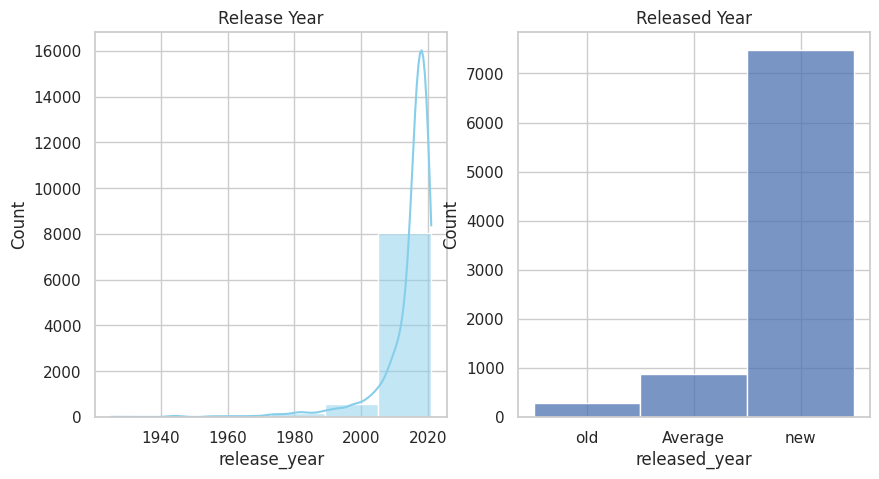

In [ ]:
df['released_year'] = pd.cut(df['release_year'],bins=[1983,1997,2009,2021],labels=['old','Average','new'])
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['release_year'],bins=6,kde=True,ax=axes[0],color='skyblue')
axes[0].set_title('Release Year')
sns.histplot(df['released_year'],ax=axes[1],palette='magma')
axes[1].set_title('Released Year')